To demonstrate the ``CPPPlot().ranking()`` method, we first load the example feature set from for the ``DOM_GSEC`` data (see [Breimann25a]_):

In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False

df_feat = aa.load_features()
df_feat = df_feat.sort_values(by="feat_importance", ascending=False).reset_index(drop=True)
aa.display_df(df_feat, show_shape=True, n_rows=20)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",4.729200,4.776785
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",4.106000,5.236574
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",3.048800,3.623912
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",2.833600,3.640617
6,"TMD_C_JMD_C-Pat...4,8)-KANM800103",Conformation,α-helix,α-helix,"Average relativ...sa-Tsong, 1980)",0.176000,0.087846,0.087846,0.140464,0.157561,0.000004,0.000113,"24,28",2.704000,4.076269
7,"TMD_C_JMD_C-Pat...,10)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.149000,0.073526,0.073526,0.133612,0.157088,0.000090,0.000714,"31,34,38",2.050800,2.338278
8,"TMD_C_JMD_C-Seg...4,5)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.204000,0.105513,0.105513,0.132849,0.145219,0.000000,0.000009,"33,34,35,36",1.992000,2.929460
9,"TMD_C_JMD_C-Seg...,11)-QIAN880134",Conformation,Coil,Coil,"Weights for coi...ejnowski, 1988)",0.181000,0.057287,-0.057287,0.072234,0.106512,0.000002,0.000076,"28,29",1.919600,2.094497
10,"TMD-PeriodicPat...3,4)-VELV850101",Energy,Electron-ion interaction pot.,Electron-ion in...ction potential,"Electron-ion in...c et al., 1985)",0.180000,0.069277,-0.069277,0.094949,0.119524,0.000002,0.000082,"13,16,20,23,27",1.818000,2.308293


You can now create the ``CPP-Ranking Plot``, which shows the features in the order of the ``df_feat`` DataFrame. Three subplots are given (from left to right):

a) **Feature Position Subplot**: Shows the position of the respective ``Part-Split`` combinations depending on the size of the TMD and JMDs.

b) **Feature Mean Difference Subplot**: Shows the mean differences between the test and reference dataset. Higher values for the test set are indicated in red and lower values in blue.

c) **Feature Ranking Subplot**: Shows the feature importance (or sample-specific impact) as bar chart.

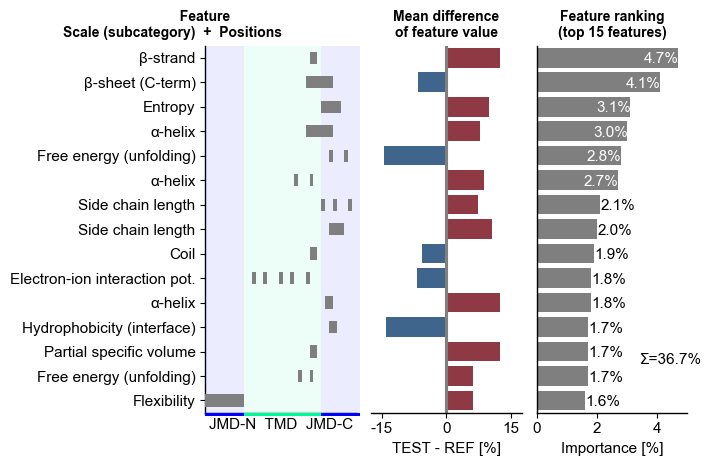

In [2]:
cpp_plot = aa.CPPPlot()
aa.plot_settings(weight_bold=False, short_ticks=True)
cpp_plot.ranking(df_feat=df_feat)
plt.show()

Select the number of features using the ``n_top`` parameter:

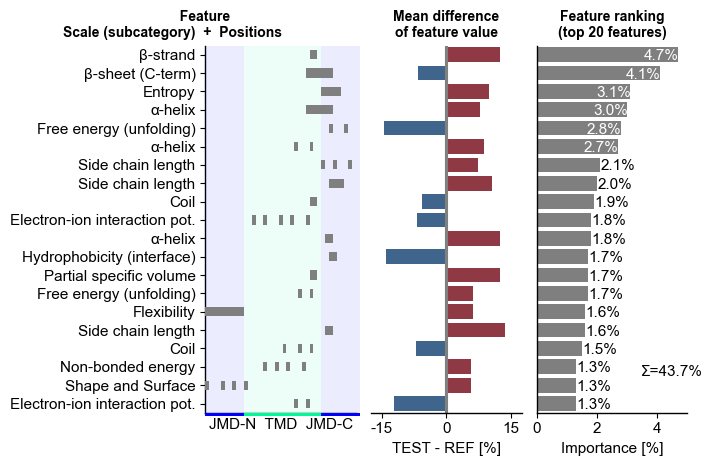

In [3]:
# Show ranking of top 20 features
cpp_plot.ranking(df_feat=df_feat, n_top=20)
plt.show()

Disable the sorting in descending of feature importance order by setting ``rank=False`` (default=True): 

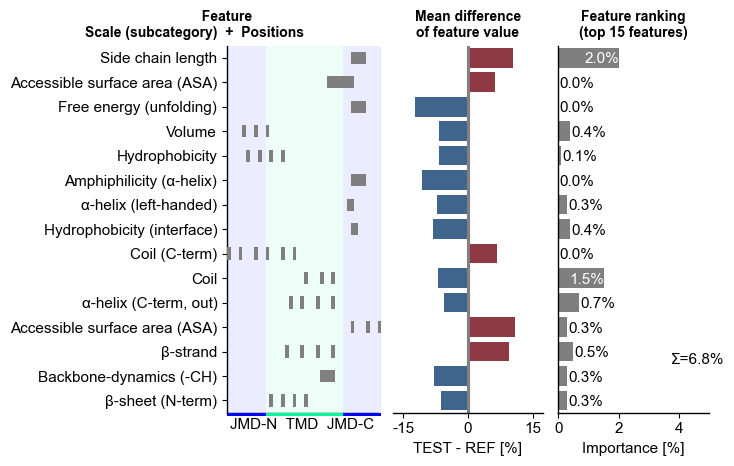

In [4]:
# Show 15 random features
cpp_plot.ranking(df_feat=df_feat.sample(15), rank=False)
plt.show()

You can adjust the TMD size using the ``tmd_len`` parameter and the sizes of the JMDs using the ``jmd_c_len`` and ``jmd_n_len`` attributes of the ``CPPPlot`` class:

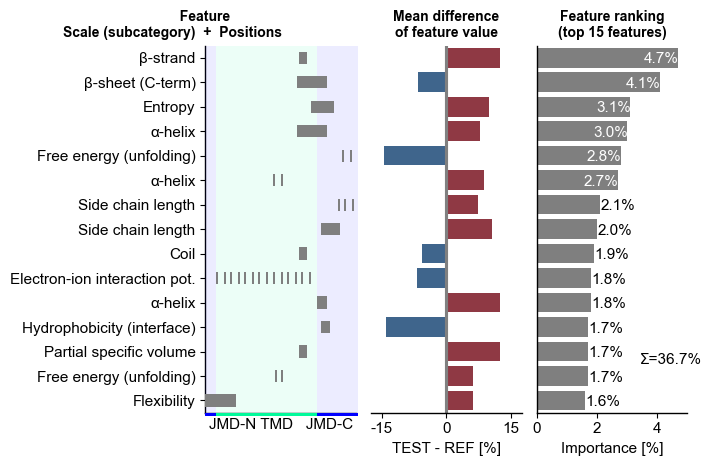

In [5]:
# Change part length
cpp_plot = aa.CPPPlot(jmd_n_len=5, jmd_c_len=20)
cpp_plot.ranking(df_feat=df_feat, tmd_len=50)
plt.show()

Adjust the colors and transparency using the ``tmd_color``, ``jmd_color``, and ``tmd_jmd_alpha`` parameters:

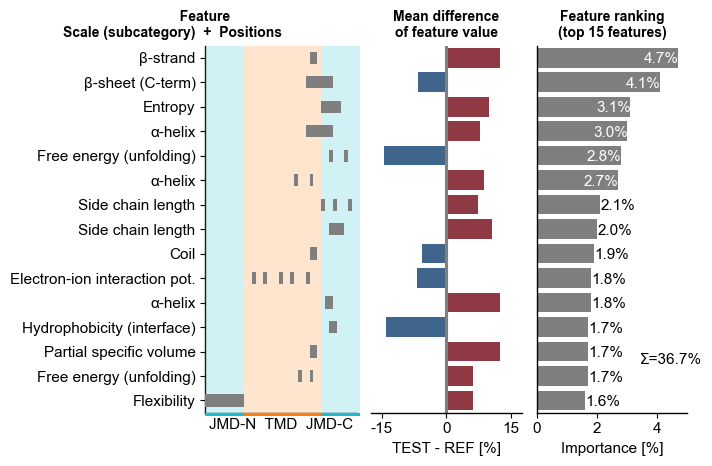

In [6]:
# Create a new CPPPlot object with default jmd length
cpp_plot = aa.CPPPlot()
cpp_plot.ranking(df_feat=df_feat, tmd_color="tab:orange", jmd_color="tab:cyan", tmd_jmd_alpha=0.2)
plt.show()

For the ``Feature Mean Difference Subplot``, you can adjust the name of the test and reference dataset using the ``name_test`` and ``name_ref`` parameters: 

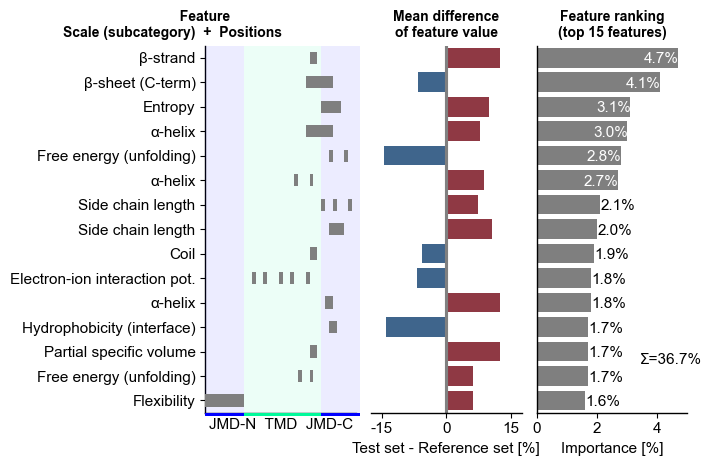

In [7]:
# Change name of datasets
cpp_plot.ranking(df_feat=df_feat, name_test="Test set", name_ref="Reference set")
plt.show()

Potential overlap of labels and other fonts can be mitigated by adjusting the font sizes using the following parameters: ``fontsize_titles`` (default=10), ``fontsize_labels`` (default=11), and ``fontsize_annotations`` (default=11):

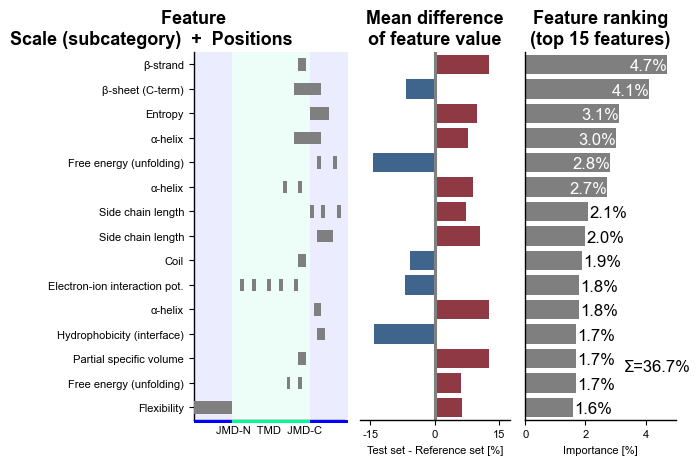

In [8]:
# Adjust font sizes
cpp_plot.ranking(df_feat=df_feat, 
                 name_test="Test set", name_ref="Reference set",
                 fontsize_titles=13, fontsize_labels=8, fontsize_annotations=12)
plt.show()

Increase the distance of TMD and JMD labels using the ``tmd_jmd_space`` (default=2) parameter:

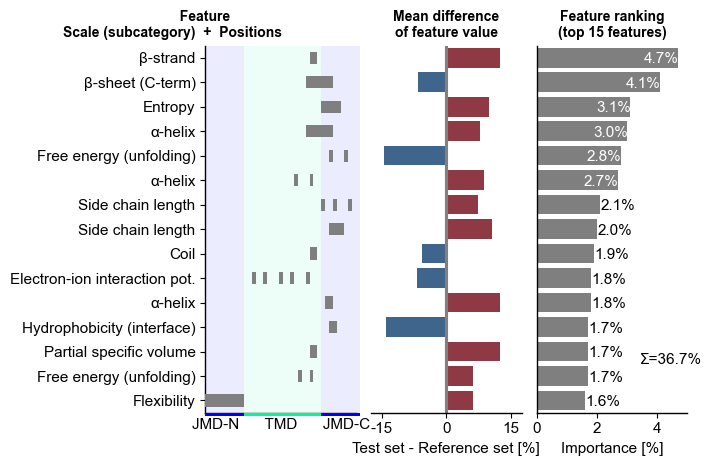

In [9]:
# Change spacing between TMD and JMDs
cpp_plot.ranking(df_feat=df_feat, 
                 name_test="Test set", name_ref="Reference set",
                 tmd_jmd_space=6)
plt.show()

You can adjust the x-limits using ``xlim_dif`` and ``xlim_rank``. Mean difference values exceeding the set x-axis limit are given on the respective bars:

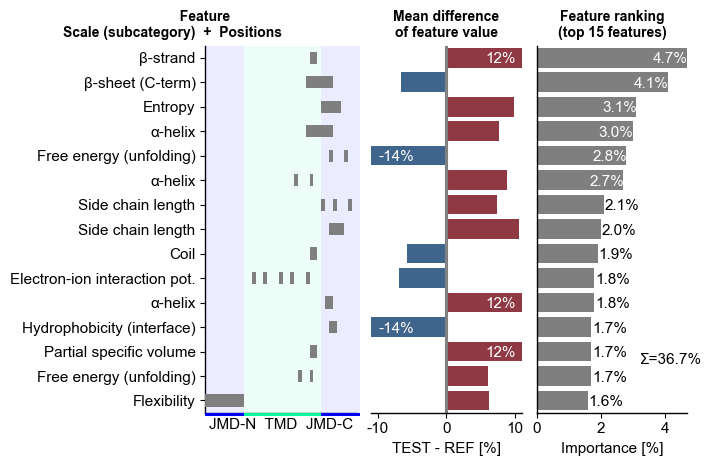

In [10]:
# Modify x-axis limits
cpp_plot.ranking(df_feat=df_feat, xlim_dif=(-11, 11), xlim_rank=(0, 4))
plt.show()

To avoid an overlap of bars with the ranking information (the total feature importance if ``shap_plot=False``), you can change its x-axis and y-axis position using the ``rank_info_xy`` parameter:

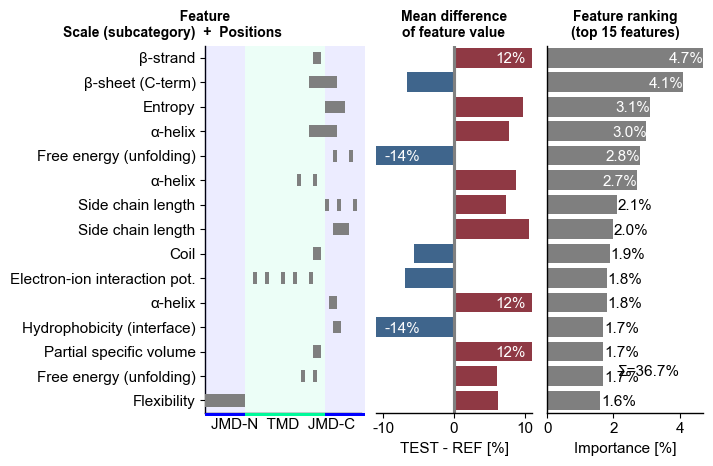

In [11]:
cpp_plot.ranking(df_feat=df_feat, xlim_dif=(-11, 11), xlim_rank=(0, 4), rank_info_xy=(4, 13))
plt.show()

**CPP-SHAP analysis**

Set ``shap_plot=True`` for visualizing the sample-specific feature impact instead of the overall feature importance. To demonstrate this we first obtain the DOM_GSEC example dataset, matching to the already used feature set (see [Breimann25a]_):

In [12]:
aa.options["verbose"] = False
# Load example dataset
df_seq = aa.load_dataset(name="DOM_GSEC", n=3)
labels = df_seq["label"].to_list()

# Create feature matrix
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

aa.display_df(df_seq)

,entry,sequence,label,tmd_start,tmd_stop,jmd_n,tmd,jmd_c
1,Q14802,MQKVTLGLLVFLAGF...PGETPPLITPGSAQS,0,37,59,NSPFYYDWHS,LQVGGLICAGVLCAMGIIIVMSA,KCKCKFGQKS
2,Q86UE4,MAARSWQDELAQQAE...SPKQIKKKKKARRET,0,50,72,LGLEPKRYPG,WVILVGTGALGLLLLFLLGYGWA,AACAGARKKR
3,Q969W9,MHRLMGVNSTAAAAA...AIWSKEKDKQKGHPL,0,41,63,FQSMEITELE,FVQIIIIVVVMMVMVVVITCLLS,HYKLSARSFI
4,P05067,MLPGLALLLLAAWTA...GYENPTYKFFEQMQN,1,701,723,FAEDVGSNKG,AIIGLMVGGVVIATVIVITLVML,KKKQYTSIHH
5,P14925,MAGRARSGLLLLLLG...EEEYSAPLPKPAPSS,1,868,890,KLSTEPGSGV,SVVLITTLLVIPVLVLLAIVMFI,RWKKSRAFGD
6,P70180,MRSLLLFTFSACVLL...RELREDSIRSHFSVA,1,477,499,PCKSSGGLEE,SAVTGIVVGALLGAGLLMAFYFF,RKKYRITIER


We can now include the feature impact into the ``df_feat`` for all samples using the ``ShapExplainer`` model:

In [13]:
se = aa.ShapExplainer()
se.fit(X, labels=labels)

# Include feature value difference for all samples against negatives
df_feat = se.add_sample_mean_dif(X, labels=labels, df_feat=df_feat, drop=True)

# Include feature impact of all samples
df_feat = se.add_feat_impact(df_feat=df_feat, drop=True)

aa.display_df(df_feat, n_rows=5)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,mean_dif_Protein0,mean_dif_Protein1,mean_dif_Protein2,mean_dif_Protein3,mean_dif_Protein4,mean_dif_Protein5,feat_impact_Protein0,feat_impact_Protein1,feat_impact_Protein2,feat_impact_Protein3,feat_impact_Protein4,feat_impact_Protein5
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",0.286667,-0.192333,-0.094333,0.271667,0.286667,-0.083833,0.150000,-0.290000,-0.290000,0.140000,0.150000,-0.070000
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",-0.048430,-0.023140,0.071570,-0.232290,-0.211860,-0.205570,-2.540000,-2.450000,-2.470000,2.450000,2.340000,2.250000
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",0.131267,-0.269733,0.138467,0.231467,0.312467,0.277867,-1.720000,-1.580000,-1.510000,1.440000,1.550000,1.580000
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",0.036667,0.028807,-0.065473,0.137237,0.054097,0.041237,-0.320000,-0.530000,-0.970000,0.670000,0.690000,0.150000
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",0.043333,0.228333,-0.271667,-0.030667,0.043333,-0.049167,0.020000,0.020000,-0.140000,0.050000,0.050000,0.040000


Finally, we can visualize the feature impact for a selected sample by providing the respective column name in ``col_imp`` and setting ``shap_plot=True``:

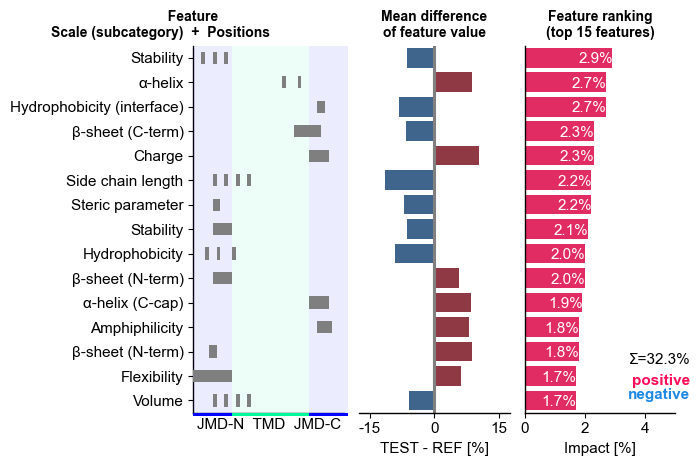

In [14]:
# Show feature impact based on 6 samples
cpp_plot.ranking(df_feat=df_feat, col_imp="feat_impact_Protein4", shap_plot=True)
plt.show()

Sort the ``df_feat`` according the respective feature impact in descending order to show the top n features. We can further specify the feature value difference and the name for the specific sample using the ``col_dif`` and ``name_test`` parameters: 

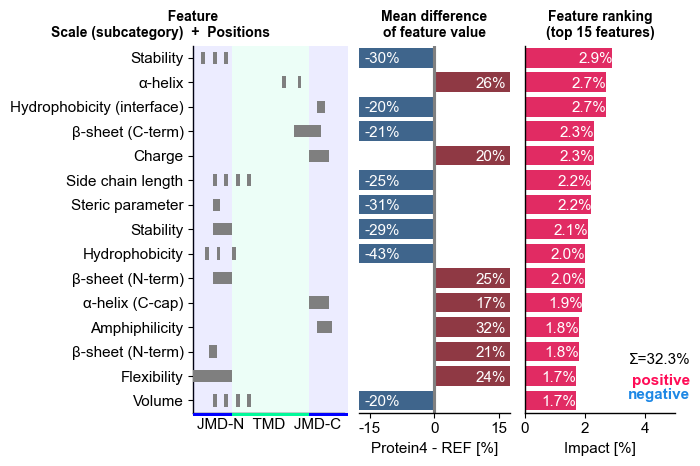

In [15]:
# Sort features in descending order for respective sample
df_feat = df_feat.sort_values(by="feat_impact_Protein4", ascending=False)

# Show ranked feature impact and feature value difference of Protein4 against negative samples
cpp_plot.ranking(df_feat=df_feat, col_dif="mean_dif_Protein4", col_imp="feat_impact_Protein4", name_test="Protein4", shap_plot=True)
plt.show()